In [1]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

 Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn= engine.connect()

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
inspect(engine).get_table_names()

['measurement', 'station']

In [7]:
Measurement = Base.classes.measurement

In [8]:
Station = Base.classes.station

In [9]:
session = Session(engine)

In [10]:
columns = inspect(engine).get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
columns = inspect(engine).get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
# Latest 12 months
prev12 = pd.read_sql("SELECT m.date as Date, m.prcp as PRCP \
                        FROM measurement as m \
                        WHERE m.date between '2016-08-24' and '2017-08-23'",conn)

prev12.head()


,Date,PRCP
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [14]:
prev12.set_index("Date", inplace = True)

In [15]:
prev12.sort_index(inplace = True)
prev12.head()

,PRCP
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


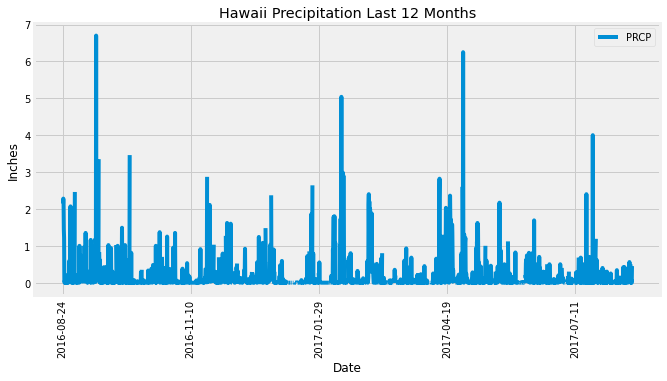

In [16]:
prev12.plot()
fig = plt.gcf() # gcf: get current figure
fig.set_size_inches(10,5)
plt.title("Hawaii Precipitation Last 12 Months")
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [17]:
prev12.describe()

,PRCP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [33]:
count = session.query(func.count(Station.id)).all()
count

[(9)]

In [19]:
print(f"There are {count[0][0]} stations")

There are 9 stations


In [20]:
active = pd.read_sql("SELECT station, count(*) as count FROM measurement Group By station Order By count DESC;",conn)

active.head()

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [21]:
active.loc[[0]]

,station,count
0,USC00519281,2772


In [22]:
active_station = active.station.loc[[0][0]]
active_station

'USC00519281'

In [23]:
USC00519281 = session.query(Measurement).filter(Measurement.station == 'USC00519281')

USC00519281.count()

2772

In [24]:
temp_min = session.query(func.min(Measurement.tobs).filter(Measurement.station == active_station)).all()[0][0]
print(f"Minimum temperature recorded at station {active_station} is {temp_min}°F")

Minimum temperature recorded at station USC00519281 is 54.0°F


In [25]:
temp_max = session.query(func.max(Measurement.tobs).filter(Measurement.station == active_station)).all()[0][0]
print(f"Maximum temperature recorded at station {active_station} is {temp_max}°F")

Maximum temperature recorded at station USC00519281 is 85.0°F


In [26]:
temp_avg = session.query(func.avg(Measurement.tobs).filter(Measurement.station == active_station)).all()[0][0]
print(f"Average temperature recorded at station {active_station} is {temp_avg}°F")

Average temperature recorded at station USC00519281 is 71.66378066378067°F


In [30]:
#Design a query to retrieve the previous 12 months of temperature observation data (TOBS).
prev12_temp = pd.read_sql("SELECT m.station, m.date, m.tobs FROM measurement as m \
                        WHERE m.date between '2016-08-24' and '2017-08-23'",conn)
prev12_temp.head()

    # Plot the results as a histogram with `bins=12`, as shown in the following image:

,station,date,tobs
0,USC00519397,2016-08-24,79.0
1,USC00519397,2016-08-25,80.0
2,USC00519397,2016-08-26,79.0
3,USC00519397,2016-08-27,77.0
4,USC00519397,2016-08-28,78.0


In [28]:
# Filter by the station with the highest number of observations.
# Query the previous 12 months of temperature observation data for this station.
active_12_temp = pd.read_sql("SELECT * FROM measurement as m \
                        WHERE m.date between '2016-08-24' and '2017-08-23'\
                          AND m.station = 'USC00519281'",conn)
active_12_temp

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0
...,...,...,...,...,...
346,14955,USC00519281,2017-08-14,0.00,77.0
347,14956,USC00519281,2017-08-15,0.32,77.0
348,14957,USC00519281,2017-08-16,0.12,76.0
349,14958,USC00519281,2017-08-17,0.01,76.0


<function matplotlib.pyplot.show(*args, **kw)>

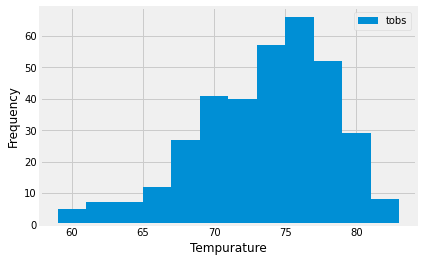

In [29]:
plt.hist(active_12_temp["tobs"], bins =12)
plt.ylabel("Frequency")
plt.xlabel("Tempurature")
plt.legend(["tobs"])
plt.show